In [170]:
### Load libraries
import pandas as pd
import numpy as np
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

In [171]:
### Import Adams Data
address = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/Davante_Adams_gamelogs.csv'
Adams = pd.read_csv(address)
Adams = Adams.drop(columns=Adams.columns[18:])
Adams

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,GS,Tgt,Rec,Yds,Y/R,TD,Ctch%,Y/Tgt
0,1.0,2014.0,9/4/14,1.0,1.0,21.254,GNB,@,SEA,L 16-36,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,NaN
1,2.0,2014.0,9/14/14,2.0,2.0,21.264,GNB,NaN,NYJ,W 31-24,NaN,7.0,5.0,50.0,10.00,0.0,71.40%,7.14
2,3.0,2014.0,9/21/14,3.0,3.0,21.271,GNB,@,DET,L 7-19,NaN,3.0,2.0,11.0,5.50,0.0,66.70%,3.67
3,4.0,2014.0,9/28/14,4.0,4.0,21.278,GNB,@,CHI,W 38-17,NaN,3.0,2.0,18.0,9.00,0.0,66.70%,6.00
4,5.0,2014.0,10/2/14,5.0,5.0,21.282,GNB,NaN,MIN,W 42-10,*,4.0,1.0,11.0,11.00,1.0,25.00%,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,NaN,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,NaN,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,@,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
### Drop 2014 and 2015 season
Adams.drop(Adams[Adams['Year'] == 2014].index, inplace = True)
Adams.drop(Adams[Adams['Year'] == 2015].index, inplace = True)
Adams

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,GS,Tgt,Rec,Yds,Y/R,TD,Ctch%,Y/Tgt
29,33.0,2016.0,9/11/16,1.0,1.0,23.262,GNB,@,JAX,W 27-23,*,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,34.0,2016.0,9/18/16,2.0,2.0,23.269,GNB,@,MIN,L 14-17,*,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,35.0,2016.0,9/25/16,3.0,3.0,23.276,GNB,NaN,DET,W 34-27,NaN,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,36.0,2016.0,10/9/16,4.0,5.0,23.290,GNB,NaN,NYG,W 23-16,*,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,37.0,2016.0,10/16/16,5.0,6.0,23.297,GNB,NaN,DAL,L 16-30,*,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,NaN,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,NaN,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,@,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
### Add HomeAway Column(Rename)
Adams = Adams.rename({'Unnamed: 7': 'HomeAway'},axis='columns')
Adams

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,GS,Tgt,Rec,Yds,Y/R,TD,Ctch%,Y/Tgt
29,33.0,2016.0,9/11/16,1.0,1.0,23.262,GNB,@,JAX,W 27-23,*,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,34.0,2016.0,9/18/16,2.0,2.0,23.269,GNB,@,MIN,L 14-17,*,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,35.0,2016.0,9/25/16,3.0,3.0,23.276,GNB,NaN,DET,W 34-27,NaN,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,36.0,2016.0,10/9/16,4.0,5.0,23.290,GNB,NaN,NYG,W 23-16,*,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,37.0,2016.0,10/16/16,5.0,6.0,23.297,GNB,NaN,DAL,L 16-30,*,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,NaN,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,NaN,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,@,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
Adams = Adams.rename({'Y/Tgt': 'YardsPerTgt'},axis='columns')
Adams = Adams.rename({'Y/R': 'YardsPerCatch'},axis='columns')
Adams

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,GS,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
29,33.0,2016.0,9/11/16,1.0,1.0,23.262,GNB,@,JAX,W 27-23,*,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,34.0,2016.0,9/18/16,2.0,2.0,23.269,GNB,@,MIN,L 14-17,*,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,35.0,2016.0,9/25/16,3.0,3.0,23.276,GNB,NaN,DET,W 34-27,NaN,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,36.0,2016.0,10/9/16,4.0,5.0,23.290,GNB,NaN,NYG,W 23-16,*,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,37.0,2016.0,10/16/16,5.0,6.0,23.297,GNB,NaN,DAL,L 16-30,*,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,NaN,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,NaN,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,@,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
### Fill NAs with H for Home Games in HomeAway column
Adams['HomeAway'].fillna('H', inplace=True)
Adams

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,GS,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
29,33.0,2016.0,9/11/16,1.0,1.0,23.262,GNB,@,JAX,W 27-23,*,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,34.0,2016.0,9/18/16,2.0,2.0,23.269,GNB,@,MIN,L 14-17,*,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,35.0,2016.0,9/25/16,3.0,3.0,23.276,GNB,H,DET,W 34-27,NaN,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,36.0,2016.0,10/9/16,4.0,5.0,23.290,GNB,H,NYG,W 23-16,*,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,37.0,2016.0,10/16/16,5.0,6.0,23.297,GNB,H,DAL,L 16-30,*,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,H,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,H,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,@,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
### Fill @s with A for Away Games in HomeAway column
Adams.loc[Adams['HomeAway'] == '@', 'HomeAway'] = 'A'
Adams

,Rk,Year,Date,G#,Week,Age,Tm,HomeAway,Opp,Result,GS,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
29,33.0,2016.0,9/11/16,1.0,1.0,23.262,GNB,A,JAX,W 27-23,*,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,34.0,2016.0,9/18/16,2.0,2.0,23.269,GNB,A,MIN,L 14-17,*,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,35.0,2016.0,9/25/16,3.0,3.0,23.276,GNB,H,DET,W 34-27,NaN,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,36.0,2016.0,10/9/16,4.0,5.0,23.290,GNB,H,NYG,W 23-16,*,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,37.0,2016.0,10/16/16,5.0,6.0,23.297,GNB,H,DAL,L 16-30,*,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,110.0,2020.0,12/19/20,14.0,15.0,27.361,GNB,H,CAR,W 24-16,*,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,111.0,2020.0,12/27/20,15.0,16.0,28.003,GNB,H,TEN,W 40-14,*,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,112.0,2020.0,1/3/21,16.0,17.0,28.010,GNB,A,CHI,W 35-16,*,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
### Delete unwanted columns
del Adams['Rk']
del Adams['G#']
del Adams['GS']
Adams

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
29,2016.0,9/11/16,1.0,23.262,GNB,A,JAX,W 27-23,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,2016.0,9/18/16,2.0,23.269,GNB,A,MIN,L 14-17,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,2016.0,9/25/16,3.0,23.276,GNB,H,DET,W 34-27,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,2016.0,10/9/16,5.0,23.290,GNB,H,NYG,W 23-16,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,2016.0,10/16/16,6.0,23.297,GNB,H,DAL,L 16-30,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2020.0,12/19/20,15.0,27.361,GNB,H,CAR,W 24-16,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,2020.0,12/27/20,16.0,28.003,GNB,H,TEN,W 40-14,12.0,11.0,142.0,12.91,3.0,91.70%,11.83
99,2020.0,1/3/21,17.0,28.010,GNB,A,CHI,W 35-16,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
100,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
### Drop NAs now
Adams = Adams.dropna()

In [179]:
Adams

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
29,2016.0,9/11/16,1.0,23.262,GNB,A,JAX,W 27-23,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,2016.0,9/18/16,2.0,23.269,GNB,A,MIN,L 14-17,7.0,3.0,26.0,8.67,0.0,42.90%,3.71
31,2016.0,9/25/16,3.0,23.276,GNB,H,DET,W 34-27,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
32,2016.0,10/9/16,5.0,23.290,GNB,H,NYG,W 23-16,8.0,5.0,85.0,17.00,1.0,62.50%,10.63
33,2016.0,10/16/16,6.0,23.297,GNB,H,DAL,L 16-30,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020.0,12/6/20,13.0,27.348,GNB,H,PHI,W 30-16,12.0,10.0,121.0,12.10,2.0,83.30%,10.08
96,2020.0,12/13/20,14.0,27.355,GNB,A,DET,W 31-24,10.0,7.0,115.0,16.43,1.0,70.00%,11.50
97,2020.0,12/19/20,15.0,27.361,GNB,H,CAR,W 24-16,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
98,2020.0,12/27/20,16.0,28.003,GNB,H,TEN,W 40-14,12.0,11.0,142.0,12.91,3.0,91.70%,11.83


In [180]:
### Split data into Years
Adams2016 = Adams[Adams['Year'].isin(['2016'])]
Adams2017 = Adams[Adams['Year'].isin(['2017'])]
Adams2018 = Adams[Adams['Year'].isin(['2018'])]
Adams2019 = Adams[Adams['Year'].isin(['2019'])]
Adams2020 = Adams[Adams['Year'].isin(['2020'])]

In [181]:
Adams2020

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
86,2020.0,9/13/20,1.0,27.264,GNB,A,MIN,W 43-34,17.0,14.0,156.0,11.14,2.0,82.40%,9.18
87,2020.0,9/20/20,2.0,27.271,GNB,H,DET,W 42-21,3.0,3.0,36.0,12.00,0.0,100.00%,12.00
88,2020.0,10/18/20,6.0,27.299,GNB,A,TAM,L 10-38,10.0,6.0,61.0,10.17,0.0,60.00%,6.10
89,2020.0,10/25/20,7.0,27.306,GNB,A,HOU,W 35-20,16.0,13.0,196.0,15.08,2.0,81.30%,12.25
90,2020.0,11/1/20,8.0,27.313,GNB,H,MIN,L 22-28,11.0,7.0,53.0,7.57,3.0,63.60%,4.82
91,2020.0,11/5/20,9.0,27.317,GNB,A,SFO,W 34-17,12.0,10.0,173.0,17.30,1.0,83.30%,14.42
92,2020.0,11/15/20,10.0,27.327,GNB,H,JAX,W 24-20,12.0,8.0,66.0,8.25,1.0,66.70%,5.50
93,2020.0,11/22/20,11.0,27.334,GNB,A,IND,L 31-34,9.0,7.0,106.0,15.14,1.0,77.80%,11.78
94,2020.0,11/29/20,12.0,27.341,GNB,H,CHI,W 41-25,9.0,6.0,61.0,10.17,1.0,66.70%,6.78
95,2020.0,12/6/20,13.0,27.348,GNB,H,PHI,W 30-16,12.0,10.0,121.0,12.10,2.0,83.30%,10.08


In [182]:
### Upload defensive statistics
address1 = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/2016_Defense_rankings.csv'
Defense2016 = pd.read_csv(address1)
address2 = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/2017_Defense_rankings.csv'
Defense2017 = pd.read_csv(address2)
address3 = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/2018_Defense_rankings.csv'
Defense2018 = pd.read_csv(address3)
address4 = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/2019_Defense_rankings.csv'
Defense2019 = pd.read_csv(address4)
address5 = '/Users/raytrey5/Desktop/NFL_Machine_Learning_Betting/2020_Defense_rankings.csv'
Defense2020 = pd.read_csv(address5)

In [183]:
### Rename TD column in defensive stats
Defense2016 = Defense2016.rename({'TD': 'PassTD'},axis='columns')
Defense2017 = Defense2017.rename({'TD': 'PassTD'},axis='columns')
Defense2018 = Defense2018.rename({'TD': 'PassTD'},axis='columns')
Defense2019 = Defense2019.rename({'TD': 'PassTD'},axis='columns')
Defense2020 = Defense2020.rename({'TD': 'PassTD'},axis='columns')

In [184]:
### View Adams opponents in 2016
Adams2016 = Adams2016.sort_values('Opp')
Adams2016

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
35,2016.0,10/30/16,8.0,23.311,GNB,A,ATL,L 32-33,14.0,12.0,74.0,6.17,0.0,85.70%,5.29
34,2016.0,10/20/16,7.0,23.301,GNB,H,CHI,W 26-10,16.0,13.0,132.0,10.15,2.0,81.30%,8.25
42,2016.0,12/18/16,15.0,23.360,GNB,A,CHI,W 30-27,6.0,2.0,25.0,12.50,0.0,33.30%,4.17
33,2016.0,10/16/16,6.0,23.297,GNB,H,DAL,L 16-30,3.0,2.0,34.0,17.00,0.0,66.70%,11.33
31,2016.0,9/25/16,3.0,23.276,GNB,H,DET,W 34-27,2.0,2.0,23.0,11.50,1.0,100.00%,11.50
44,2016.0,1/1/17,17.0,24.008,GNB,A,DET,W 31-24,9.0,6.0,31.0,5.17,2.0,66.70%,3.44
40,2016.0,12/4/16,13.0,23.346,GNB,H,HOU,W 21-13,7.0,1.0,17.0,17.00,0.0,14.30%,2.43
36,2016.0,11/6/16,9.0,23.318,GNB,H,IND,L 26-31,8.0,4.0,41.0,10.25,1.0,50.00%,5.13
29,2016.0,9/11/16,1.0,23.262,GNB,A,JAX,W 27-23,7.0,3.0,50.0,16.67,1.0,42.90%,7.14
30,2016.0,9/18/16,2.0,23.269,GNB,A,MIN,L 14-17,7.0,3.0,26.0,8.67,0.0,42.90%,3.71


In [185]:
Defense2016 = Defense2016.drop(columns=Defense2016.columns[17:])
Defense2016 = Defense2016.dropna()
Defense2016 = Defense2016.sort_values('Tm')
Defense2016

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
13,14.0,Arizona Cardinals,16.0,22.6,305.2,63.7,4.8,1.75,0.88,18.3,21.5,34.2,210.3,1.31,0.88,5.7,10.90
26,27.0,Atlanta Falcons,16.0,25.4,371.2,66.2,5.6,1.38,0.63,22.4,26.4,40.9,266.7,1.94,0.75,6.2,14.50
8,9.0,Baltimore Ravens,16.0,20.1,322.1,62.1,5.2,1.75,0.63,18.4,23.1,36.1,232.8,1.75,1.13,6.1,11.90
16,17.0,Buffalo Bills,16.0,23.6,357.0,63.7,5.6,1.13,0.38,21.1,19.1,31.9,223.9,1.19,0.75,6.5,11.40
25,26.0,Carolina Panthers,16.0,25.1,359.8,64.7,5.6,1.69,0.63,20.6,25.6,38.3,268.2,1.69,1.06,6.5,13.90
23,24.0,Chicago Bears,16.0,24.9,346.8,63.3,5.5,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
7,8.0,Cincinnati Bengals,16.0,19.7,350.8,64.9,5.4,1.25,0.19,20.4,23.4,37.1,237.5,1.38,1.06,6.1,12.30
29,30.0,Cleveland Browns,16.0,28.3,392.4,66.7,5.9,0.81,0.19,22.8,21.7,33.9,249.8,2.25,0.63,7.0,13.80
4,5.0,Dallas Cowboys,16.0,19.1,343.9,63.1,5.5,1.25,0.69,20.6,26.6,39.6,260.4,1.56,0.56,6.2,14.10
3,4.0,Denver Broncos,16.0,18.6,316.1,67.3,4.7,1.69,0.81,19.1,19.1,34.5,185.8,0.81,0.88,5.0,10.60


In [186]:
## Delete defenses he didnt play
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Arizona Cardinals'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Baltimore Ravens'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Buffalo Bills'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Carolina Panthers'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Cincinnati Bengals'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Cleveland Browns'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Denver Broncos'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Green Bay Packers'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Kansas City Chiefs'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Los Angeles Rams'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Miami Dolphins'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['New England Patriots'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['New Orleans Saints'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['New York Jets'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Oakland Raiders'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Pittsburgh Steelers'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['San Diego Chargers'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['San Francisco 49ers'])]
Defense2016 = Defense2016[~Defense2016['Tm'].isin(['Tampa Bay Buccaneers'])]
Defense2016

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
26,27.0,Atlanta Falcons,16.0,25.4,371.2,66.2,5.6,1.38,0.63,22.4,26.4,40.9,266.7,1.94,0.75,6.2,14.50
23,24.0,Chicago Bears,16.0,24.9,346.8,63.3,5.5,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
4,5.0,Dallas Cowboys,16.0,19.1,343.9,63.1,5.5,1.25,0.69,20.6,26.6,39.6,260.4,1.56,0.56,6.2,14.10
12,13.0,Detroit Lions,16.0,22.4,354.8,60.3,5.9,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.90
10,11.0,Houston Texans,16.0,20.5,301.3,59.4,5.1,1.06,0.38,17.0,19.9,32.6,201.6,1.25,0.69,5.8,9.81
21,22.0,Indianapolis Colts,16.0,24.5,382.9,64.0,6.0,1.06,0.56,22.1,23.6,36.4,262.5,1.69,0.50,6.8,14.10
24,25.0,Jacksonville Jaguars,16.0,25.0,321.7,64.4,5.0,0.81,0.38,19.1,21.6,34.4,215.3,1.25,0.44,5.9,10.90
5,6.0,Minnesota Vikings,16.0,19.2,314.9,62.1,5.1,1.69,0.81,19.0,20.8,34.3,207.9,1.38,0.88,5.6,11.60
1,2.0,New York Giants,16.0,17.8,339.7,66.4,5.1,1.56,0.50,18.6,23.1,39.4,251.1,0.94,1.06,6.0,11.90
11,12.0,Philadelphia Eagles,16.0,20.7,342.8,61.1,5.6,1.63,0.63,18.8,20.8,34.6,239.5,1.56,1.00,6.5,11.10


In [187]:
### Duplicate and order the teams he played twice
CHI = Defense2016['Tm'] == 'Chicago Bears'
df_try = Defense2016[CHI]
Defense2016 = Defense2016.append([df_try]*1,ignore_index=True)
DET = Defense2016['Tm'] == 'Detroit Lions'
df_try1 = Defense2016[DET]
Defense2016 = Defense2016.append([df_try1]*1,ignore_index=True)
MIN = Defense2016['Tm'] == 'Minnesota Vikings'
df_try2 = Defense2016[MIN]
Defense2016 = Defense2016.append([df_try2]*1,ignore_index=True)
Defense2016 = Defense2016.sort_values('Tm')
Defense2016

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,27.0,Atlanta Falcons,16.0,25.4,371.2,66.2,5.6,1.38,0.63,22.4,26.4,40.9,266.7,1.94,0.75,6.2,14.50
1,24.0,Chicago Bears,16.0,24.9,346.8,63.3,5.5,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
13,24.0,Chicago Bears,16.0,24.9,346.8,63.3,5.5,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
2,5.0,Dallas Cowboys,16.0,19.1,343.9,63.1,5.5,1.25,0.69,20.6,26.6,39.6,260.4,1.56,0.56,6.2,14.10
3,13.0,Detroit Lions,16.0,22.4,354.8,60.3,5.9,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.90
14,13.0,Detroit Lions,16.0,22.4,354.8,60.3,5.9,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.90
4,11.0,Houston Texans,16.0,20.5,301.3,59.4,5.1,1.06,0.38,17.0,19.9,32.6,201.6,1.25,0.69,5.8,9.81
5,22.0,Indianapolis Colts,16.0,24.5,382.9,64.0,6.0,1.06,0.56,22.1,23.6,36.4,262.5,1.69,0.50,6.8,14.10
6,25.0,Jacksonville Jaguars,16.0,25.0,321.7,64.4,5.0,0.81,0.38,19.1,21.6,34.4,215.3,1.25,0.44,5.9,10.90
7,6.0,Minnesota Vikings,16.0,19.2,314.9,62.1,5.1,1.69,0.81,19.0,20.8,34.3,207.9,1.38,0.88,5.6,11.60


In [188]:
#### merge the two dataframes together
Adams2016 = pd.concat([Adams2016.reset_index(drop=True),Defense2016.reset_index(drop=True)], axis=1)
Adams2016

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2016.0,10/30/16,8.0,23.311,GNB,A,ATL,L 32-33,14.0,12.0,...,1.38,0.63,22.4,26.4,40.9,266.7,1.94,0.75,6.2,14.50
1,2016.0,10/20/16,7.0,23.301,GNB,H,CHI,W 26-10,16.0,13.0,...,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
2,2016.0,12/18/16,15.0,23.360,GNB,A,CHI,W 30-27,6.0,2.0,...,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.80
3,2016.0,10/16/16,6.0,23.297,GNB,H,DAL,L 16-30,3.0,2.0,...,1.25,0.69,20.6,26.6,39.6,260.4,1.56,0.56,6.2,14.10
4,2016.0,9/25/16,3.0,23.276,GNB,H,DET,W 34-27,2.0,2.0,...,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.90
5,2016.0,1/1/17,17.0,24.008,GNB,A,DET,W 31-24,9.0,6.0,...,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.90
6,2016.0,12/4/16,13.0,23.346,GNB,H,HOU,W 21-13,7.0,1.0,...,1.06,0.38,17.0,19.9,32.6,201.6,1.25,0.69,5.8,9.81
7,2016.0,11/6/16,9.0,23.318,GNB,H,IND,L 26-31,8.0,4.0,...,1.06,0.56,22.1,23.6,36.4,262.5,1.69,0.50,6.8,14.10
8,2016.0,9/11/16,1.0,23.262,GNB,A,JAX,W 27-23,7.0,3.0,...,0.81,0.38,19.1,21.6,34.4,215.3,1.25,0.44,5.9,10.90
9,2016.0,9/18/16,2.0,23.269,GNB,A,MIN,L 14-17,7.0,3.0,...,1.69,0.81,19.0,20.8,34.3,207.9,1.38,0.88,5.6,11.60


In [189]:
### repeat for following seasons
### View Adams opponents in 2017
Adams2017 = Adams2017.sort_values('Opp')
Adams2017

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
46,2017.0,9/17/17,2.0,24.267,GNB,A,ATL,L 23-34,10.0,8.0,99.0,12.38,1.0,80.00%,9.90
54,2017.0,11/19/17,11.0,24.330,GNB,H,BAL,L 0-23,10.0,8.0,126.0,15.75,0.0,80.00%,12.60
58,2017.0,12/17/17,15.0,24.358,GNB,A,CAR,L 24-31,7.0,5.0,57.0,11.40,1.0,71.40%,8.14
48,2017.0,9/28/17,4.0,24.278,GNB,H,CHI,W 35-14,5.0,2.0,13.0,6.50,1.0,40.00%,2.60
53,2017.0,11/12/17,10.0,24.323,GNB,A,CHI,W 23-16,8.0,5.0,90.0,18.00,1.0,62.50%,11.25
47,2017.0,9/24/17,3.0,24.274,GNB,H,CIN,W 27-24,6.0,3.0,60.0,20.00,0.0,50.00%,10.00
57,2017.0,12/10/17,14.0,24.351,GNB,A,CLE,W 27-21,14.0,10.0,84.0,8.40,2.0,71.40%,6.00
49,2017.0,10/8/17,5.0,24.288,GNB,A,DAL,W 35-31,11.0,7.0,66.0,9.43,2.0,63.60%,6.00
52,2017.0,11/6/17,9.0,24.317,GNB,H,DET,L 17-30,10.0,7.0,53.0,7.57,0.0,70.00%,5.30
50,2017.0,10/15/17,6.0,24.295,GNB,A,MIN,L 10-23,10.0,5.0,54.0,10.80,1.0,50.00%,5.40


In [190]:
Defense2017 = Defense2017.drop(columns=Defense2017.columns[17:])
Defense2017 = Defense2017.dropna()
Defense2017 = Defense2017.sort_values('Tm')
Defense2017

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
18,19.0,Arizona Cardinals,16.0,22.6,310.8,63.0,4.9,1.31,0.38,17.7,21.4,35.3,221.3,1.50,0.94,5.9,11.70
7,8.0,Atlanta Falcons,16.0,19.7,318.4,62.1,5.1,1.00,0.50,20.2,22.6,34.6,214.3,1.38,0.50,5.8,12.30
5,6.0,Baltimore Ravens,16.0,18.9,325.1,65.3,5.0,2.13,0.75,18.5,20.8,35.6,213.8,1.13,1.38,5.6,11.20
17,18.0,Buffalo Bills,16.0,22.4,355.1,66.6,5.3,1.56,0.44,21.8,23.1,35.8,230.5,0.88,1.13,6.1,12.40
10,11.0,Carolina Panthers,16.0,20.4,317.1,59.6,5.3,1.31,0.69,17.6,21.9,34.4,229.1,1.56,0.63,6.1,11.70
8,9.0,Chicago Bears,16.0,20.0,319.1,62.7,5.1,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
15,16.0,Cincinnati Bengals,16.0,21.8,339.1,68.2,5.0,0.88,0.19,20.3,21.0,35.1,211.2,1.25,0.69,5.6,10.80
30,31.0,Cleveland Browns,16.0,25.6,328.1,64.1,5.1,0.81,0.38,19.7,22.5,32.8,230.3,1.75,0.44,6.6,11.80
12,13.0,Dallas Cowboys,16.0,20.8,318.1,62.5,5.1,1.31,0.69,19.5,23.2,34.9,214.1,1.75,0.63,5.7,11.30
22,23.0,Denver Broncos,16.0,23.9,290.0,59.5,4.9,1.06,0.44,16.6,18.4,30.7,200.6,1.81,0.63,6.1,10.40


In [191]:
## Delete defenses he didnt play
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Arizona Cardinals'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Buffalo Bills'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Denver Broncos'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Green Bay Packers'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Houston Texans'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Indianapolis Colts'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Jacksonville Jaguars'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Kansas City Chiefs'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Los Angeles Rams'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Miami Dolphins'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['New England Patriots'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['New York Giants'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['New York Jets'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Oakland Raiders'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Philadelphia Eagles'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Los Angeles Chargers'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['San Francisco 49ers'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Tennessee Titans'])]
Defense2017 = Defense2017[~Defense2017['Tm'].isin(['Washington Redskins'])]
Defense2017

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
7,8.0,Atlanta Falcons,16.0,19.7,318.4,62.1,5.1,1.00,0.50,20.2,22.6,34.6,214.3,1.38,0.50,5.8,12.30
5,6.0,Baltimore Ravens,16.0,18.9,325.1,65.3,5.0,2.13,0.75,18.5,20.8,35.6,213.8,1.13,1.38,5.6,11.20
10,11.0,Carolina Panthers,16.0,20.4,317.1,59.6,5.3,1.31,0.69,17.6,21.9,34.4,229.1,1.56,0.63,6.1,11.70
8,9.0,Chicago Bears,16.0,20.0,319.1,62.7,5.1,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
15,16.0,Cincinnati Bengals,16.0,21.8,339.1,68.2,5.0,0.88,0.19,20.3,21.0,35.1,211.2,1.25,0.69,5.6,10.80
30,31.0,Cleveland Browns,16.0,25.6,328.1,64.1,5.1,0.81,0.38,19.7,22.5,32.8,230.3,1.75,0.44,6.6,11.80
12,13.0,Dallas Cowboys,16.0,20.8,318.1,62.5,5.1,1.31,0.69,19.5,23.2,34.9,214.1,1.75,0.63,5.7,11.30
20,21.0,Detroit Lions,16.0,23.5,355.8,64.8,5.5,2.00,0.81,21.8,22.9,35.6,243.3,1.31,1.19,6.4,12.80
0,1.0,Minnesota Vikings,16.0,15.8,275.9,59.8,4.6,1.19,0.31,16.3,20.3,34.7,192.4,0.81,0.88,5.2,10.50
9,10.0,New Orleans Saints,16.0,20.4,336.5,62.6,5.4,1.56,0.31,19.3,20.6,34.6,224.8,1.38,1.25,6.0,10.80


In [192]:
### Duplicate and order the teams he played twice
CHI = Defense2017['Tm'] == 'Chicago Bears'
df_try = Defense2017[CHI]
Defense2017 = Defense2017.append([df_try]*1,ignore_index=True)

In [193]:
Defense2017 = Defense2017.sort_values('Tm')
Defense2017

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,8.0,Atlanta Falcons,16.0,19.7,318.4,62.1,5.1,1.00,0.50,20.2,22.6,34.6,214.3,1.38,0.50,5.8,12.30
1,6.0,Baltimore Ravens,16.0,18.9,325.1,65.3,5.0,2.13,0.75,18.5,20.8,35.6,213.8,1.13,1.38,5.6,11.20
2,11.0,Carolina Panthers,16.0,20.4,317.1,59.6,5.3,1.31,0.69,17.6,21.9,34.4,229.1,1.56,0.63,6.1,11.70
3,9.0,Chicago Bears,16.0,20.0,319.1,62.7,5.1,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
13,9.0,Chicago Bears,16.0,20.0,319.1,62.7,5.1,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
4,16.0,Cincinnati Bengals,16.0,21.8,339.1,68.2,5.0,0.88,0.19,20.3,21.0,35.1,211.2,1.25,0.69,5.6,10.80
5,31.0,Cleveland Browns,16.0,25.6,328.1,64.1,5.1,0.81,0.38,19.7,22.5,32.8,230.3,1.75,0.44,6.6,11.80
6,13.0,Dallas Cowboys,16.0,20.8,318.1,62.5,5.1,1.31,0.69,19.5,23.2,34.9,214.1,1.75,0.63,5.7,11.30
7,21.0,Detroit Lions,16.0,23.5,355.8,64.8,5.5,2.00,0.81,21.8,22.9,35.6,243.3,1.31,1.19,6.4,12.80
8,1.0,Minnesota Vikings,16.0,15.8,275.9,59.8,4.6,1.19,0.31,16.3,20.3,34.7,192.4,0.81,0.88,5.2,10.50


In [194]:
#### merge the two dataframes together
Adams2017 = pd.concat([Adams2017.reset_index(drop=True),Defense2017.reset_index(drop=True)], axis=1)
Adams2017

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2017.0,9/17/17,2.0,24.267,GNB,A,ATL,L 23-34,10.0,8.0,...,1.00,0.50,20.2,22.6,34.6,214.3,1.38,0.50,5.8,12.30
1,2017.0,11/19/17,11.0,24.330,GNB,H,BAL,L 0-23,10.0,8.0,...,2.13,0.75,18.5,20.8,35.6,213.8,1.13,1.38,5.6,11.20
2,2017.0,12/17/17,15.0,24.358,GNB,A,CAR,L 24-31,7.0,5.0,...,1.31,0.69,17.6,21.9,34.4,229.1,1.56,0.63,6.1,11.70
3,2017.0,9/28/17,4.0,24.278,GNB,H,CHI,W 35-14,5.0,2.0,...,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
4,2017.0,11/12/17,10.0,24.323,GNB,A,CHI,W 23-16,8.0,5.0,...,1.38,0.88,18.6,21.4,33.1,211.0,1.13,0.50,5.9,11.30
5,2017.0,9/24/17,3.0,24.274,GNB,H,CIN,W 27-24,6.0,3.0,...,0.88,0.19,20.3,21.0,35.1,211.2,1.25,0.69,5.6,10.80
6,2017.0,12/10/17,14.0,24.351,GNB,A,CLE,W 27-21,14.0,10.0,...,0.81,0.38,19.7,22.5,32.8,230.3,1.75,0.44,6.6,11.80
7,2017.0,10/8/17,5.0,24.288,GNB,A,DAL,W 35-31,11.0,7.0,...,1.31,0.69,19.5,23.2,34.9,214.1,1.75,0.63,5.7,11.30
8,2017.0,11/6/17,9.0,24.317,GNB,H,DET,L 17-30,10.0,7.0,...,2.00,0.81,21.8,22.9,35.6,243.3,1.31,1.19,6.4,12.80
9,2017.0,10/15/17,6.0,24.295,GNB,A,MIN,L 10-23,10.0,5.0,...,1.19,0.31,16.3,20.3,34.7,192.4,0.81,0.88,5.2,10.50


In [195]:
### View Adams opponents in 2018
Adams2018 = Adams2018.sort_values('Opp')
Adams2018

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
70,2018.0,12/2/18,13.0,25.343,GNB,H,ARI,L 17-20,13.0,8.0,93.0,11.63,1.0,61.50%,7.15
71,2018.0,12/9/18,14.0,25.350,GNB,H,ATL,W 34-20,11.0,7.0,81.0,11.57,1.0,63.60%,7.36
62,2018.0,9/30/18,4.0,25.280,GNB,H,BUF,W 22-0,14.0,8.0,81.0,10.13,0.0,57.10%,5.79
59,2018.0,9/9/18,1.0,25.259,GNB,H,CHI,W 24-23,8.0,5.0,88.0,17.60,1.0,62.50%,11.00
72,2018.0,12/16/18,15.0,25.357,GNB,A,CHI,L 17-24,13.0,8.0,119.0,14.88,0.0,61.50%,9.15
63,2018.0,10/7/18,5.0,25.287,GNB,A,DET,L 23-31,12.0,9.0,140.0,15.56,1.0,75.00%,11.67
65,2018.0,10/28/18,8.0,25.308,GNB,A,LAR,L 27-29,7.0,5.0,133.0,26.60,0.0,71.40%,19.00
67,2018.0,11/11/18,10.0,25.322,GNB,H,MIA,W 31-12,7.0,4.0,57.0,14.25,2.0,57.10%,8.14
60,2018.0,9/16/18,2.0,25.266,GNB,H,MIN,T 29-29,12.0,8.0,64.0,8.00,1.0,66.70%,5.33
69,2018.0,11/25/18,12.0,25.336,GNB,A,MIN,L 17-24,8.0,5.0,69.0,13.80,1.0,62.50%,8.63


In [196]:
Defense2018 = Defense2018.drop(columns=Defense2018.columns[17:])
Defense2018 = Defense2018.dropna()
Defense2018 = Defense2018.sort_values('Tm')

In [197]:
## Delete defenses he didnt play
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Denver Broncos'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Green Bay Packers'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Houston Texans'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Indianapolis Colts'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Jacksonville Jaguars'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Kansas City Chiefs'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['New York Giants'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['New Orleans Saints'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Oakland Raiders'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Philadelphia Eagles'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Los Angeles Chargers'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Dallas Cowboys'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Baltimore Ravens'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Tennessee Titans'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Carolina Panthers'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Cincinnati Bengals'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Cleveland Browns'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Pittsburgh Steelers'])]
Defense2018 = Defense2018[~Defense2018['Tm'].isin(['Tampa Bay Buccaneers'])]
Defense2018

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
25,26.0,Arizona Cardinals,16.0,26.6,358.8,66.6,5.4,1.00,0.56,22.3,21.4,31.6,203.9,1.31,0.44,5.9,11.60
24,25.0,Atlanta Falcons,16.0,26.4,384.5,64.4,6.0,1.19,0.25,23.4,24.9,36.6,259.6,2.06,0.94,6.7,14.10
17,18.0,Buffalo Bills,16.0,23.4,294.1,60.5,4.9,1.69,0.69,18.3,19.6,30.8,179.2,1.38,1.00,5.4,9.81
0,1.0,Chicago Bears,16.0,17.7,299.7,62.8,4.8,2.25,0.56,17.4,23.6,38.4,219.7,1.38,1.69,5.3,11.60
15,16.0,Detroit Lions,16.0,22.5,335.0,58.9,5.7,0.88,0.44,19.7,20.2,31.0,224.9,1.81,0.44,6.7,11.90
19,20.0,Los Angeles Rams,16.0,24.0,358.6,60.0,6.0,1.88,0.75,20.1,21.7,33.3,236.3,1.94,1.13,6.6,11.60
26,27.0,Miami Dolphins,16.0,27.1,391.1,64.0,6.1,1.75,0.44,21.9,20.9,31.8,245.8,1.94,1.31,7.3,12.20
8,9.0,Minnesota Vikings,16.0,21.3,309.7,62.1,5.0,1.25,0.50,18.9,19.7,31.4,196.3,0.94,0.75,5.7,10.00
6,7.0,New England Patriots,16.0,20.3,359.1,62.6,5.7,1.75,0.63,20.1,23.1,37.8,246.4,1.81,1.13,6.2,13.00
28,29.0,New York Jets,16.0,27.6,380.4,66.3,5.7,1.25,0.44,21.4,22.9,36.4,254.1,1.81,0.81,6.5,12.60


In [198]:
### Duplicate and order the teams he played twice
CHI = Defense2018['Tm'] == 'Chicago Bears'
df_try = Defense2018[CHI]
Defense2018 = Defense2018.append([df_try]*1,ignore_index=True)
MIN = Defense2018['Tm'] == 'Minnesota Vikings'
df_try1 = Defense2018[MIN]
Defense2018 = Defense2018.append([df_try1]*1,ignore_index=True)

In [199]:
Defense2018 = Defense2018.sort_values('Tm')
Defense2018

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,26.0,Arizona Cardinals,16.0,26.6,358.8,66.6,5.4,1.00,0.56,22.3,21.4,31.6,203.9,1.31,0.44,5.9,11.60
1,25.0,Atlanta Falcons,16.0,26.4,384.5,64.4,6.0,1.19,0.25,23.4,24.9,36.6,259.6,2.06,0.94,6.7,14.10
2,18.0,Buffalo Bills,16.0,23.4,294.1,60.5,4.9,1.69,0.69,18.3,19.6,30.8,179.2,1.38,1.00,5.4,9.81
3,1.0,Chicago Bears,16.0,17.7,299.7,62.8,4.8,2.25,0.56,17.4,23.6,38.4,219.7,1.38,1.69,5.3,11.60
13,1.0,Chicago Bears,16.0,17.7,299.7,62.8,4.8,2.25,0.56,17.4,23.6,38.4,219.7,1.38,1.69,5.3,11.60
4,16.0,Detroit Lions,16.0,22.5,335.0,58.9,5.7,0.88,0.44,19.7,20.2,31.0,224.9,1.81,0.44,6.7,11.90
5,20.0,Los Angeles Rams,16.0,24.0,358.6,60.0,6.0,1.88,0.75,20.1,21.7,33.3,236.3,1.94,1.13,6.6,11.60
6,27.0,Miami Dolphins,16.0,27.1,391.1,64.0,6.1,1.75,0.44,21.9,20.9,31.8,245.8,1.94,1.31,7.3,12.20
7,9.0,Minnesota Vikings,16.0,21.3,309.7,62.1,5.0,1.25,0.50,18.9,19.7,31.4,196.3,0.94,0.75,5.7,10.00
14,9.0,Minnesota Vikings,16.0,21.3,309.7,62.1,5.0,1.25,0.50,18.9,19.7,31.4,196.3,0.94,0.75,5.7,10.00


In [200]:
#### merge the two dataframes together
Adams2018 = pd.concat([Adams2018.reset_index(drop=True),Defense2018.reset_index(drop=True)], axis=1)
Adams2018

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2018.0,12/2/18,13.0,25.343,GNB,H,ARI,L 17-20,13.0,8.0,...,1.00,0.56,22.3,21.4,31.6,203.9,1.31,0.44,5.9,11.60
1,2018.0,12/9/18,14.0,25.350,GNB,H,ATL,W 34-20,11.0,7.0,...,1.19,0.25,23.4,24.9,36.6,259.6,2.06,0.94,6.7,14.10
2,2018.0,9/30/18,4.0,25.280,GNB,H,BUF,W 22-0,14.0,8.0,...,1.69,0.69,18.3,19.6,30.8,179.2,1.38,1.00,5.4,9.81
3,2018.0,9/9/18,1.0,25.259,GNB,H,CHI,W 24-23,8.0,5.0,...,2.25,0.56,17.4,23.6,38.4,219.7,1.38,1.69,5.3,11.60
4,2018.0,12/16/18,15.0,25.357,GNB,A,CHI,L 17-24,13.0,8.0,...,2.25,0.56,17.4,23.6,38.4,219.7,1.38,1.69,5.3,11.60
5,2018.0,10/7/18,5.0,25.287,GNB,A,DET,L 23-31,12.0,9.0,...,0.88,0.44,19.7,20.2,31.0,224.9,1.81,0.44,6.7,11.90
6,2018.0,10/28/18,8.0,25.308,GNB,A,LAR,L 27-29,7.0,5.0,...,1.88,0.75,20.1,21.7,33.3,236.3,1.94,1.13,6.6,11.60
7,2018.0,11/11/18,10.0,25.322,GNB,H,MIA,W 31-12,7.0,4.0,...,1.75,0.44,21.9,20.9,31.8,245.8,1.94,1.31,7.3,12.20
8,2018.0,9/16/18,2.0,25.266,GNB,H,MIN,T 29-29,12.0,8.0,...,1.25,0.50,18.9,19.7,31.4,196.3,0.94,0.75,5.7,10.00
9,2018.0,11/25/18,12.0,25.336,GNB,A,MIN,L 17-24,8.0,5.0,...,1.25,0.50,18.9,19.7,31.4,196.3,0.94,0.75,5.7,10.00


In [201]:
### View Adams opponents in 2019
Adams2019 = Adams2019.sort_values('Opp')
Adams2019

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
79,2019.0,11/10/19,10.0,26.321,GNB,H,CAR,W 24-16,10.0,7.0,118.0,16.86,0.0,70.00%,11.80
74,2019.0,9/5/19,1.0,26.255,GNB,A,CHI,W 10-3,8.0,4.0,36.0,9.00,0.0,50.00%,4.50
83,2019.0,12/15/19,15.0,26.356,GNB,H,CHI,W 21-13,13.0,7.0,103.0,14.71,1.0,53.80%,7.92
76,2019.0,9/22/19,3.0,26.272,GNB,H,DEN,W 27-16,4.0,4.0,56.0,14.00,0.0,100.00%,14.00
85,2019.0,12/29/19,17.0,27.005,GNB,A,DET,W 23-20,13.0,7.0,93.0,13.29,1.0,53.80%,7.15
78,2019.0,11/3/19,9.0,26.314,GNB,A,LAC,L 11-26,11.0,7.0,41.0,5.86,0.0,63.60%,3.73
75,2019.0,9/15/19,2.0,26.265,GNB,H,MIN,W 21-16,9.0,7.0,106.0,15.14,0.0,77.80%,11.78
84,2019.0,12/23/19,16.0,26.364,GNB,A,MIN,W 23-10,16.0,13.0,116.0,8.92,0.0,81.30%,7.25
81,2019.0,12/1/19,13.0,26.342,GNB,A,NYG,W 31-13,10.0,6.0,64.0,10.67,2.0,60.00%,6.40
77,2019.0,9/26/19,4.0,26.276,GNB,H,PHI,L 27-34,15.0,10.0,180.0,18.00,0.0,66.70%,12.00


In [202]:
Defense2019 = Defense2019.drop(columns=Defense2019.columns[17:])
Defense2019 = Defense2019.dropna()
Defense2019 = Defense2019.sort_values('Tm')

In [203]:
## Delete defenses he didnt play
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['New York Jets'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Arizona Cardinals'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Atlanta Falcons'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Green Bay Packers'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Houston Texans'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Indianapolis Colts'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Jacksonville Jaguars'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Kansas City Chiefs'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Miami Dolphins'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['New Orleans Saints'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Oakland Raiders'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Buffalo Bills'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Los Angeles Rams'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Dallas Cowboys'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Baltimore Ravens'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Tennessee Titans'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['New England Patriots'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Cincinnati Bengals'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Cleveland Browns'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Pittsburgh Steelers'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Seattle Seahawks'])]
Defense2019 = Defense2019[~Defense2019['Tm'].isin(['Tampa Bay Buccaneers'])]
Defense2019

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
30,31.0,Carolina Panthers,16.0,29.4,374.5,65.1,5.8,1.31,0.44,22.2,21.7,34.0,231.0,1.31,0.88,6.2,12.30
3,4.0,Chicago Bears,16.0,18.6,324.1,63.6,5.1,1.19,0.56,19.1,22.6,35.7,222.1,1.06,0.63,5.9,11.90
9,10.0,Denver Broncos,16.0,19.8,337.0,62.7,5.4,1.06,0.44,19.1,21.8,33.6,225.6,1.19,0.63,6.3,10.90
25,26.0,Detroit Lions,16.0,26.4,400.4,68.4,5.9,1.13,0.69,22.8,23.8,38.2,284.4,2.06,0.44,7.1,14.50
13,14.0,Los Angeles Chargers,16.0,21.6,313.1,57.7,5.4,0.88,0.19,17.8,20.5,29.0,200.3,1.31,0.69,6.5,9.75
4,5.0,Minnesota Vikings,16.0,18.9,341.6,65.8,5.2,1.94,0.88,20.3,24.6,37.6,233.6,1.44,1.06,5.8,13.40
29,30.0,New York Giants,16.0,28.2,377.3,66.3,5.7,1.00,0.38,21.4,23.1,34.8,264.1,1.88,0.63,7.1,13.20
14,15.0,Philadelphia Eagles,16.0,22.1,331.7,60.4,5.5,1.25,0.56,18.1,21.8,35.7,241.6,1.69,0.69,6.3,11.60
7,8.0,San Francisco 49ers,16.0,19.4,281.8,60.5,4.7,1.69,0.94,17.8,19.9,32.4,169.2,1.44,0.75,4.8,9.38
26,27.0,Washington Redskins,16.0,27.2,385.1,67.4,5.7,1.38,0.56,22.1,23.2,33.8,238.9,2.19,0.81,6.5,12.50


In [204]:
### Duplicate and order the teams he played twice
CHI = Defense2019['Tm'] == 'Chicago Bears'
df_try = Defense2019[CHI]
Defense2019 = Defense2019.append([df_try]*1,ignore_index=True)
MIN = Defense2019['Tm'] == 'Minnesota Vikings'
df_try1 = Defense2019[MIN]
Defense2019 = Defense2019.append([df_try1]*1,ignore_index=True)
Defense2019 = Defense2019.sort_values('Tm')
Defense2019

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,31.0,Carolina Panthers,16.0,29.4,374.5,65.1,5.8,1.31,0.44,22.2,21.7,34.0,231.0,1.31,0.88,6.2,12.30
1,4.0,Chicago Bears,16.0,18.6,324.1,63.6,5.1,1.19,0.56,19.1,22.6,35.7,222.1,1.06,0.63,5.9,11.90
10,4.0,Chicago Bears,16.0,18.6,324.1,63.6,5.1,1.19,0.56,19.1,22.6,35.7,222.1,1.06,0.63,5.9,11.90
2,10.0,Denver Broncos,16.0,19.8,337.0,62.7,5.4,1.06,0.44,19.1,21.8,33.6,225.6,1.19,0.63,6.3,10.90
3,26.0,Detroit Lions,16.0,26.4,400.4,68.4,5.9,1.13,0.69,22.8,23.8,38.2,284.4,2.06,0.44,7.1,14.50
4,14.0,Los Angeles Chargers,16.0,21.6,313.1,57.7,5.4,0.88,0.19,17.8,20.5,29.0,200.3,1.31,0.69,6.5,9.75
5,5.0,Minnesota Vikings,16.0,18.9,341.6,65.8,5.2,1.94,0.88,20.3,24.6,37.6,233.6,1.44,1.06,5.8,13.40
11,5.0,Minnesota Vikings,16.0,18.9,341.6,65.8,5.2,1.94,0.88,20.3,24.6,37.6,233.6,1.44,1.06,5.8,13.40
6,30.0,New York Giants,16.0,28.2,377.3,66.3,5.7,1.00,0.38,21.4,23.1,34.8,264.1,1.88,0.63,7.1,13.20
7,15.0,Philadelphia Eagles,16.0,22.1,331.7,60.4,5.5,1.25,0.56,18.1,21.8,35.7,241.6,1.69,0.69,6.3,11.60


In [205]:
#### merge the two dataframes together
Adams2019 = pd.concat([Adams2019.reset_index(drop=True),Defense2019.reset_index(drop=True)], axis=1)
Adams2019

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2019.0,11/10/19,10.0,26.321,GNB,H,CAR,W 24-16,10.0,7.0,...,1.31,0.44,22.2,21.7,34.0,231.0,1.31,0.88,6.2,12.30
1,2019.0,9/5/19,1.0,26.255,GNB,A,CHI,W 10-3,8.0,4.0,...,1.19,0.56,19.1,22.6,35.7,222.1,1.06,0.63,5.9,11.90
2,2019.0,12/15/19,15.0,26.356,GNB,H,CHI,W 21-13,13.0,7.0,...,1.19,0.56,19.1,22.6,35.7,222.1,1.06,0.63,5.9,11.90
3,2019.0,9/22/19,3.0,26.272,GNB,H,DEN,W 27-16,4.0,4.0,...,1.06,0.44,19.1,21.8,33.6,225.6,1.19,0.63,6.3,10.90
4,2019.0,12/29/19,17.0,27.005,GNB,A,DET,W 23-20,13.0,7.0,...,1.13,0.69,22.8,23.8,38.2,284.4,2.06,0.44,7.1,14.50
5,2019.0,11/3/19,9.0,26.314,GNB,A,LAC,L 11-26,11.0,7.0,...,0.88,0.19,17.8,20.5,29.0,200.3,1.31,0.69,6.5,9.75
6,2019.0,9/15/19,2.0,26.265,GNB,H,MIN,W 21-16,9.0,7.0,...,1.94,0.88,20.3,24.6,37.6,233.6,1.44,1.06,5.8,13.40
7,2019.0,12/23/19,16.0,26.364,GNB,A,MIN,W 23-10,16.0,13.0,...,1.94,0.88,20.3,24.6,37.6,233.6,1.44,1.06,5.8,13.40
8,2019.0,12/1/19,13.0,26.342,GNB,A,NYG,W 31-13,10.0,6.0,...,1.00,0.38,21.4,23.1,34.8,264.1,1.88,0.63,7.1,13.20
9,2019.0,9/26/19,4.0,26.276,GNB,H,PHI,L 27-34,15.0,10.0,...,1.25,0.56,18.1,21.8,35.7,241.6,1.69,0.69,6.3,11.60


In [206]:
### View Adams opponents in 2020
Adams2020 = Adams2020.sort_values('Opp')
Adams2020

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
97,2020.0,12/19/20,15.0,27.361,GNB,H,CAR,W 24-16,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
94,2020.0,11/29/20,12.0,27.341,GNB,H,CHI,W 41-25,9.0,6.0,61.0,10.17,1.0,66.70%,6.78
99,2020.0,1/3/21,17.0,28.010,GNB,A,CHI,W 35-16,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
87,2020.0,9/20/20,2.0,27.271,GNB,H,DET,W 42-21,3.0,3.0,36.0,12.00,0.0,100.00%,12.00
96,2020.0,12/13/20,14.0,27.355,GNB,A,DET,W 31-24,10.0,7.0,115.0,16.43,1.0,70.00%,11.50
89,2020.0,10/25/20,7.0,27.306,GNB,A,HOU,W 35-20,16.0,13.0,196.0,15.08,2.0,81.30%,12.25
93,2020.0,11/22/20,11.0,27.334,GNB,A,IND,L 31-34,9.0,7.0,106.0,15.14,1.0,77.80%,11.78
92,2020.0,11/15/20,10.0,27.327,GNB,H,JAX,W 24-20,12.0,8.0,66.0,8.25,1.0,66.70%,5.50
86,2020.0,9/13/20,1.0,27.264,GNB,A,MIN,W 43-34,17.0,14.0,156.0,11.14,2.0,82.40%,9.18
90,2020.0,11/1/20,8.0,27.313,GNB,H,MIN,L 22-28,11.0,7.0,53.0,7.57,3.0,63.60%,4.82


In [207]:
Defense2020 = Defense2020.drop(columns=Defense2020.columns[17:])
Defense2020 = Defense2020.dropna()
Defense2020 = Defense2020.sort_values('Tm')
Defense2020

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
11,12.0,Arizona Cardinals,16.0,22.9,351.9,65.9,5.3,1.31,0.63,22.7,22.8,35.6,226.4,1.63,0.69,5.9,12.9
18,19.0,Atlanta Falcons,16.0,25.9,398.4,64.6,6.2,1.31,0.56,22.9,26.6,39.1,293.6,2.13,0.75,7.2,14.9
1,2.0,Baltimore Ravens,16.0,18.9,329.8,63.6,5.2,1.38,0.75,21.7,23.8,37.3,221.0,1.38,0.63,5.6,13.3
15,16.0,Buffalo Bills,16.0,23.4,352.5,64.1,5.5,1.63,0.69,21.9,23.1,35.8,232.9,1.44,0.94,6.1,12.4
17,18.0,Carolina Panthers,16.0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2
13,14.0,Chicago Bears,16.0,23.1,344.9,63.8,5.4,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
21,22.0,Cincinnati Bengals,16.0,26.5,389.2,63.8,6.1,1.06,0.38,21.4,21.3,33.8,241.2,2.00,0.69,6.9,12.0
20,21.0,Cleveland Browns,16.0,26.2,358.4,64.7,5.5,1.31,0.63,22.0,23.2,36.6,247.6,1.94,0.69,6.4,13.4
27,28.0,Dallas Cowboys,16.0,29.6,386.4,65.9,5.9,1.44,0.81,22.4,20.5,32.1,227.6,2.13,0.63,6.7,11.3
24,25.0,Denver Broncos,16.0,27.9,367.9,65.2,5.6,1.00,0.38,20.8,23.4,35.4,237.9,1.31,0.63,6.3,12.6


In [208]:
### View Adams opponents in 2020
Adams2020 = Adams2020.sort_values('Opp')
Adams2020

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,Yds,YardsPerCatch,TD,Ctch%,YardsPerTgt
97,2020.0,12/19/20,15.0,27.361,GNB,H,CAR,W 24-16,10.0,7.0,42.0,6.00,0.0,70.00%,4.20
94,2020.0,11/29/20,12.0,27.341,GNB,H,CHI,W 41-25,9.0,6.0,61.0,10.17,1.0,66.70%,6.78
99,2020.0,1/3/21,17.0,28.010,GNB,A,CHI,W 35-16,6.0,6.0,46.0,7.67,1.0,100.00%,7.67
87,2020.0,9/20/20,2.0,27.271,GNB,H,DET,W 42-21,3.0,3.0,36.0,12.00,0.0,100.00%,12.00
96,2020.0,12/13/20,14.0,27.355,GNB,A,DET,W 31-24,10.0,7.0,115.0,16.43,1.0,70.00%,11.50
89,2020.0,10/25/20,7.0,27.306,GNB,A,HOU,W 35-20,16.0,13.0,196.0,15.08,2.0,81.30%,12.25
93,2020.0,11/22/20,11.0,27.334,GNB,A,IND,L 31-34,9.0,7.0,106.0,15.14,1.0,77.80%,11.78
92,2020.0,11/15/20,10.0,27.327,GNB,H,JAX,W 24-20,12.0,8.0,66.0,8.25,1.0,66.70%,5.50
86,2020.0,9/13/20,1.0,27.264,GNB,A,MIN,W 43-34,17.0,14.0,156.0,11.14,2.0,82.40%,9.18
90,2020.0,11/1/20,8.0,27.313,GNB,H,MIN,L 22-28,11.0,7.0,53.0,7.57,3.0,63.60%,4.82


In [209]:
## Delete defenses he didnt play
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['New York Jets'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Arizona Cardinals'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Atlanta Falcons'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Green Bay Packers'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Denver Broncos'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Los Angeles Chargers'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Las Vegas Raiders'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Kansas City Chiefs'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Miami Dolphins'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['New Orleans Saints'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Buffalo Bills'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Los Angeles Rams'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Dallas Cowboys'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Baltimore Ravens'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['New York Giants'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['New England Patriots'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Cincinnati Bengals'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Cleveland Browns'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Pittsburgh Steelers'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Seattle Seahawks'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Dallas Cowboys'])]
Defense2020 = Defense2020[~Defense2020['Tm'].isin(['Washington Football Team'])]
Defense2020

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
17,18.0,Carolina Panthers,16.0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2
13,14.0,Chicago Bears,16.0,23.1,344.9,63.8,5.4,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
31,32.0,Detroit Lions,16.0,32.4,419.8,66.8,6.3,0.75,0.31,25.9,23.9,34.8,284.9,2.38,0.44,7.8,15.8
26,27.0,Houston Texans,16.0,29.0,416.8,66.8,6.2,0.56,0.38,24.4,23.6,33.8,256.5,1.88,0.19,7.1,13.9
9,10.0,Indianapolis Colts,16.0,22.6,332.1,62.0,5.4,1.56,0.63,20.6,23.1,35.1,241.6,1.50,0.94,6.4,12.7
30,31.0,Jacksonville Jaguars,16.0,30.8,417.7,66.8,6.3,1.06,0.31,24.6,23.1,33.3,264.4,2.13,0.75,7.7,13.1
28,29.0,Minnesota Vikings,16.0,29.7,393.3,64.8,6.1,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0
19,20.0,Philadelphia Eagles,16.0,26.1,363.1,66.3,5.5,1.19,0.69,21.3,22.8,33.1,237.4,1.69,0.50,6.6,13.1
16,17.0,San Francisco 49ers,16.0,24.4,314.4,62.3,5.0,1.25,0.50,19.4,21.3,33.6,207.9,1.56,0.75,5.9,11.0
7,8.0,Tampa Bay Buccaneers,16.0,22.2,327.1,63.9,5.1,1.56,0.63,19.9,26.6,38.6,246.6,1.81,0.94,5.9,13.4


In [210]:
### Duplicate and order the teams he played twice
CHI = Defense2020['Tm'] == 'Chicago Bears'
df_try = Defense2020[CHI]
Defense2020 = Defense2020.append([df_try]*1,ignore_index=True)
DET = Defense2020['Tm'] == 'Detroit Lions'
df_try1 = Defense2020[DET]
Defense2020 = Defense2020.append([df_try1]*1,ignore_index=True)
MIN = Defense2020['Tm'] == 'Minnesota Vikings'
df_try2 = Defense2020[MIN]
Defense2020 = Defense2020.append([df_try2]*1,ignore_index=True)
Defense2020 = Defense2020.sort_values('Tm')
Defense2020

,Rk,Tm,G,PF,ToTYds,Ply,Y/P,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,18.0,Carolina Panthers,16.0,25.1,360.1,63.9,5.6,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2
1,14.0,Chicago Bears,16.0,23.1,344.9,63.8,5.4,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
11,14.0,Chicago Bears,16.0,23.1,344.9,63.8,5.4,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
2,32.0,Detroit Lions,16.0,32.4,419.8,66.8,6.3,0.75,0.31,25.9,23.9,34.8,284.9,2.38,0.44,7.8,15.8
12,32.0,Detroit Lions,16.0,32.4,419.8,66.8,6.3,0.75,0.31,25.9,23.9,34.8,284.9,2.38,0.44,7.8,15.8
3,27.0,Houston Texans,16.0,29.0,416.8,66.8,6.2,0.56,0.38,24.4,23.6,33.8,256.5,1.88,0.19,7.1,13.9
4,10.0,Indianapolis Colts,16.0,22.6,332.1,62.0,5.4,1.56,0.63,20.6,23.1,35.1,241.6,1.50,0.94,6.4,12.7
5,31.0,Jacksonville Jaguars,16.0,30.8,417.7,66.8,6.3,1.06,0.31,24.6,23.1,33.3,264.4,2.13,0.75,7.7,13.1
6,29.0,Minnesota Vikings,16.0,29.7,393.3,64.8,6.1,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0
13,29.0,Minnesota Vikings,16.0,29.7,393.3,64.8,6.1,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0


In [211]:
#### merge the two dataframes together
Adams2020 = pd.concat([Adams2020.reset_index(drop=True),Defense2020.reset_index(drop=True)], axis=1)
Adams2020

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2020.0,12/19/20,15.0,27.361,GNB,H,CAR,W 24-16,10.0,7.0,...,1.38,0.94,22.5,24.9,36.6,239.1,1.75,0.44,6.2,13.2
1,2020.0,11/29/20,12.0,27.341,GNB,H,CHI,W 41-25,9.0,6.0,...,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
2,2020.0,1/3/21,17.0,28.010,GNB,A,CHI,W 35-16,6.0,6.0,...,1.13,0.50,20.7,21.9,34.2,231.6,1.75,0.63,6.4,11.9
3,2020.0,9/20/20,2.0,27.271,GNB,H,DET,W 42-21,3.0,3.0,...,0.75,0.31,25.9,23.9,34.8,284.9,2.38,0.44,7.8,15.8
4,2020.0,12/13/20,14.0,27.355,GNB,A,DET,W 31-24,10.0,7.0,...,0.75,0.31,25.9,23.9,34.8,284.9,2.38,0.44,7.8,15.8
5,2020.0,10/25/20,7.0,27.306,GNB,A,HOU,W 35-20,16.0,13.0,...,0.56,0.38,24.4,23.6,33.8,256.5,1.88,0.19,7.1,13.9
6,2020.0,11/22/20,11.0,27.334,GNB,A,IND,L 31-34,9.0,7.0,...,1.56,0.63,20.6,23.1,35.1,241.6,1.50,0.94,6.4,12.7
7,2020.0,11/15/20,10.0,27.327,GNB,H,JAX,W 24-20,12.0,8.0,...,1.06,0.31,24.6,23.1,33.3,264.4,2.13,0.75,7.7,13.1
8,2020.0,9/13/20,1.0,27.264,GNB,A,MIN,W 43-34,17.0,14.0,...,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0
9,2020.0,11/1/20,8.0,27.313,GNB,H,MIN,L 22-28,11.0,7.0,...,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0


In [212]:
### Merge the dataframes together
frames = [Adams2016,Adams2017,Adams2018,Adams2019,Adams2020]

Adams = pd.concat(frames)
Adams

,Year,Date,Week,Age,Tm,HomeAway,Opp,Result,Tgt,Rec,...,TO,FL,1stD,Cmp,Att,PassYds,PassTD,Int,NY/A,1stD.1
0,2016.0,10/30/16,8.0,23.311,GNB,A,ATL,L 32-33,14.0,12.0,...,1.38,0.63,22.4,26.4,40.9,266.7,1.94,0.75,6.2,14.5
1,2016.0,10/20/16,7.0,23.301,GNB,H,CHI,W 26-10,16.0,13.0,...,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.8
2,2016.0,12/18/16,15.0,23.360,GNB,A,CHI,W 30-27,6.0,2.0,...,0.69,0.19,20.1,21.4,33.1,224.9,1.38,0.50,6.3,11.8
3,2016.0,10/16/16,6.0,23.297,GNB,H,DAL,L 16-30,3.0,2.0,...,1.25,0.69,20.6,26.6,39.6,260.4,1.56,0.56,6.2,14.1
4,2016.0,9/25/16,3.0,23.276,GNB,H,DET,W 34-27,2.0,2.0,...,0.88,0.25,20.8,24.9,34.3,248.4,2.06,0.63,6.9,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2020.0,11/1/20,8.0,27.313,GNB,H,MIN,L 22-28,11.0,7.0,...,1.38,0.44,22.9,22.4,33.8,258.8,1.88,0.94,7.3,13.0
10,2020.0,12/6/20,13.0,27.348,GNB,H,PHI,W 30-16,12.0,10.0,...,1.19,0.69,21.3,22.8,33.1,237.4,1.69,0.50,6.6,13.1
11,2020.0,11/5/20,9.0,27.317,GNB,A,SFO,W 34-17,12.0,10.0,...,1.25,0.50,19.4,21.3,33.6,207.9,1.56,0.75,5.9,11.0
12,2020.0,10/18/20,6.0,27.299,GNB,A,TAM,L 10-38,10.0,6.0,...,1.56,0.63,19.9,26.6,38.6,246.6,1.81,0.94,5.9,13.4


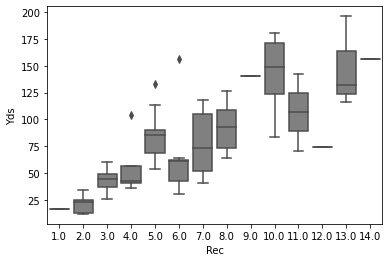

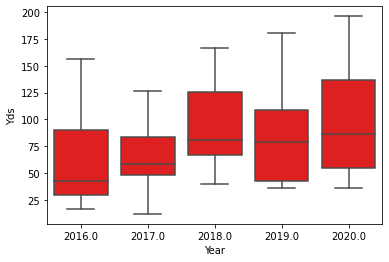

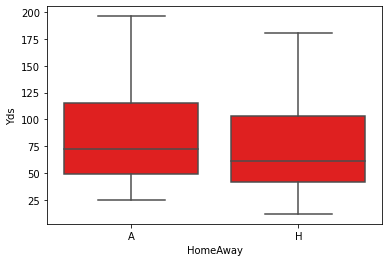

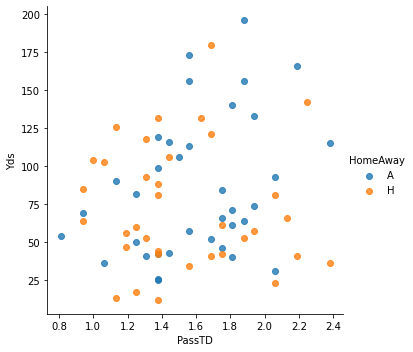

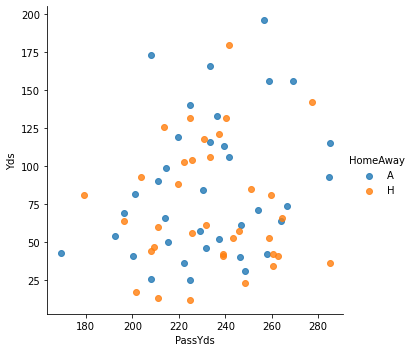

In [213]:
### Boxplots to display relationships
### Receptions and Yards
sns.boxplot(x="Rec", y="Yds", data=Adams, color = "gray");
plt.show()
### Year and Yards
sns.boxplot(x="Year", y="Yds", data=Adams, color = "red");
plt.show()
### Homeaway and Yards
sns.boxplot(x="HomeAway", y="Yds", data=Adams, color = "red");
plt.show()
### Opp PassTds and Yards
sns.lmplot( x="PassTD", y="Yds", data=Adams, fit_reg=False, hue='HomeAway', legend=True)
plt.show()
### Opp Pass Yds and Yards
sns.lmplot( x="PassYds", y="Yds", data=Adams, fit_reg=False, hue='HomeAway', legend=True)
plt.show()

In [224]:
# Find variables correalted to receiving yards
corr = Adams.corr().abs()
corr = corr.loc[corr['Yds']>.20]
corr.index

Index(['Year', 'Age', 'Tgt', 'Rec', 'Yds', 'YardsPerCatch', 'TD',
       'YardsPerTgt'],
      dtype='object')

In [249]:
Adams.columns

Index(['Year', 'Date', 'Week', 'Age', 'Tm', 'HomeAway', 'Opp', 'Result', 'Tgt',
       'Rec', 'Yds', 'YardsPerCatch', 'TD', 'Ctch%', 'YardsPerTgt', 'Rk', 'Tm',
       'G', 'PF', 'ToTYds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att',
       'PassYds', 'PassTD', 'Int', 'NY/A', '1stD.1', 'runiform'],
      dtype='object')

In [217]:
## Subset Home and Away Games
Adams_Home = Adams[Adams['HomeAway'].isin(['H'])]
Adams_Away = Adams[Adams['HomeAway'].isin(['A'])]

In [218]:
### Avg receiving yards at home
Adams_Home['Yds'].mean()

72.97142857142858

In [219]:
### Avg receiving yards on the road
Adams_Away['Yds'].mean()

85.69444444444444

In [220]:
# Linear Regression Model to predict Adams's Yds

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Yds ~ PassYds + Int + TD + Rec + PassTD + PF')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-220-3b568c8a4e4e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
<ipython-input-220-3b568c8a4e4e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


In [221]:
# Calculate Mean Squared Error
mse = mean_squared_error(Adams_test['Yds'], Adams_test['predicted_Yds'])
rmse = np.sqrt(mse)
rmse

45.74493466853054

In [222]:
Adams_test[['Opp','Rec','Yds','predicted_Yds']]

,Opp,Rec,Yds,predicted_Yds
0,ATL,12.0,74.0,153.386150
1,BAL,8.0,126.0,99.184240
6,CLE,10.0,84.0,115.372372
3,CHI,5.0,88.0,55.521313
6,LAR,5.0,133.0,50.770969
10,NWE,6.0,40.0,72.611020
11,NYJ,11.0,71.0,135.069043
12,SEA,10.0,166.0,109.142959
1,CHI,4.0,36.0,64.315816
5,LAC,7.0,41.0,79.438952


In [225]:
Adams.columns

Index(['Year', 'Date', 'Week', 'Age', 'Tm', 'HomeAway', 'Opp', 'Result', 'Tgt',
       'Rec', 'Yds', 'YardsPerCatch', 'TD', 'Ctch%', 'YardsPerTgt', 'Rk', 'Tm',
       'G', 'PF', 'ToTYds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att',
       'PassYds', 'PassTD', 'Int', 'NY/A', '1stD.1', 'runiform'],
      dtype='object')

In [263]:
# Linear Regression Model to predict Adams's Yds

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Yds ~ PassYds + Cmp + TD + Rec + PassTD + PF')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-263-3708beca9b13>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
<ipython-input-263-3708beca9b13>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


In [264]:
# Calculate Mean Squared Error
mse = mean_squared_error(Adams_test['Yds'], Adams_test['predicted_Yds'])
rmse = np.sqrt(mse)
rmse

43.27069448437076

In [265]:
Adams_test[['Opp','Rec','Yds','predicted_Yds']]

,Opp,Rec,Yds,predicted_Yds
0,ATL,12.0,74.0,143.697275
1,BAL,8.0,126.0,113.147665
6,CLE,10.0,84.0,110.057739
3,CHI,5.0,88.0,51.569067
6,LAR,5.0,133.0,64.773609
10,NWE,6.0,40.0,81.270715
11,NYJ,11.0,71.0,141.420543
12,SEA,10.0,166.0,117.618079
1,CHI,4.0,36.0,56.942015
5,LAC,7.0,41.0,81.734956


In [267]:
Adams2020['Rec'].mean()

8.214285714285714

In [268]:
Adams2020['TD'].mean()

1.2857142857142858

In [269]:
# initialize Week 1 opponent data
NewOrleansData = [{'PF': 21.1, 'PassTD': 1.75, 'Rec': 8.21, 'TD': 1.29, 'PassYds' : 217, 'Cmp': 20.8}]
# Create the pandas DataFrame
Adams_NO = pd.DataFrame(NewOrleansData)
Adams_NO

,PF,PassTD,Rec,TD,PassYds,Cmp
0,21.1,1.75,8.21,1.29,217,20.8


In [270]:
Adams_NO['predicted_Yds'] = train_model_fit.predict(Adams_NO)
Adams_NO

,PF,PassTD,Rec,TD,PassYds,Cmp,predicted_Yds
0,21.1,1.75,8.21,1.29,217,20.8,98.767136


In [229]:
# Linear Regression Model to predict Adams's Yds

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Yds ~ PassYds + Cmp + Rec')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-229-55f839b9909d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Yds'] = train_model_fit.fittedvalues
<ipython-input-229-55f839b9909d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Yds'] = train_model_fit.predict(Adams_test)


In [230]:
# Calculate Mean Squared Error
mse = mean_squared_error(Adams_test['Yds'], Adams_test['predicted_Yds'])
rmse = np.sqrt(mse)
rmse

41.61449988682773

In [231]:
Adams_test[['Opp','Rec','Yds','predicted_Yds']]

,Opp,Rec,Yds,predicted_Yds
0,ATL,12.0,74.0,137.382431
1,BAL,8.0,126.0,98.359907
6,CLE,10.0,84.0,119.590904
3,CHI,5.0,88.0,49.135029
6,LAR,5.0,133.0,69.270257
10,NWE,6.0,40.0,77.438267
11,NYJ,11.0,71.0,140.877878
12,SEA,10.0,166.0,127.273855
1,CHI,4.0,36.0,44.853967
5,LAC,7.0,41.0,81.689847


In [233]:
# Linear Regression Model to predict Adams's Receptions

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Rec ~ Tgt + PassYds + Int + TD + PassTD + PF')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Rec'] = train_model_fit.fittedvalues
Adams_test['predicted_Rec'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-233-db58b216fb6e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Rec'] = train_model_fit.fittedvalues
<ipython-input-233-db58b216fb6e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Rec'] = train_model_fit.predict(Adams_test)


In [234]:
# Calculate Mean Squared Error
mse = mean_squared_error(Adams_test['Rec'], Adams_test['predicted_Rec'])
rmse = np.sqrt(mse)
rmse

1.3652259081379507

In [237]:
Adams_test[['Opp','Yds','Tgt','Rec','predicted_Rec']]

,Opp,Yds,Tgt,Rec,predicted_Rec
0,ATL,74.0,14.0,12.0,9.886256
1,BAL,126.0,10.0,8.0,5.882907
6,CLE,84.0,14.0,10.0,9.946726
3,CHI,88.0,8.0,5.0,4.943052
6,LAR,133.0,7.0,5.0,4.328765
10,NWE,40.0,9.0,6.0,6.324235
11,NYJ,71.0,18.0,11.0,12.741759
12,SEA,166.0,12.0,10.0,8.193133
1,CHI,36.0,8.0,4.0,4.691764
5,LAC,41.0,11.0,7.0,6.585187


In [253]:
# Linear Regression Model to predict Adams's Targets

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Tgt ~ Rec + PF + ToTYds + Ply + TO + FL + Cmp + Att + PassYds + PassTD + Int')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-253-c7071a545cdd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
<ipython-input-253-c7071a545cdd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)


In [254]:
# Linear Regression Model to predict Adams's Targets

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Tgt ~ Rec + PF + Ply + Cmp + Att + PassYds')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-254-cf8a31d45922>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
<ipython-input-254-cf8a31d45922>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)


In [260]:
# Linear Regression Model to predict Adams's Targets

# employ training-and-test regimen for model validation
np.random.seed(1234)
Adams['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Adams))
Adams_train = Adams[Adams['runiform'] >= 0.25]
Adams_test = Adams[Adams['runiform'] < 0.25]
# check training data frame
print('\nAdams_train data frame (rows, columns): ',Adams_train.shape)
print(Adams_train.head())
# check test data frame
print('\nAdams_test data frame (rows, columns): ',Adams_test.shape)
print(Adams_test.head())

# specify a simple model with Yards entered last
my_model = str('Tgt ~ PF + Ply + Cmp + Att + PassYds + Yds')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = Adams_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)


Adams_train data frame (rows, columns):  (56, 33)
     Year      Date  Week     Age   Tm HomeAway  Opp   Result   Tgt   Rec  \
1  2016.0  10/20/16   7.0  23.301  GNB        H  CHI  W 26-10  16.0  13.0   
2  2016.0  12/18/16  15.0  23.360  GNB        A  CHI  W 30-27   6.0   2.0   
3  2016.0  10/16/16   6.0  23.297  GNB        H  DAL  L 16-30   3.0   2.0   
4  2016.0   9/25/16   3.0  23.276  GNB        H  DET  W 34-27   2.0   2.0   
5  2016.0    1/1/17  17.0  24.008  GNB        A  DET  W 31-24   9.0   6.0   

   ...    FL  1stD   Cmp   Att  PassYds  PassTD   Int  NY/A  1stD.1  runiform  
1  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.622109  
2  ...  0.19  20.1  21.4  33.1    224.9    1.38  0.50   6.3    11.8  0.437728  
3  ...  0.69  20.6  26.6  39.6    260.4    1.56  0.56   6.2    14.1  0.785359  
4  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.779976  
5  ...  0.25  20.8  24.9  34.3    248.4    2.06  0.63   6.9    12.9  0.272593  

[5 ro

<ipython-input-260-2b1af35f99fc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_train['predicted_Tgt'] = train_model_fit.fittedvalues
<ipython-input-260-2b1af35f99fc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_test['predicted_Tgt'] = train_model_fit.predict(Adams_test)
